In [124]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn
sklearn.__version__
%matplotlib inline
from matplotlib import pyplot as plt
#from sklearn.tree

In [125]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('../cleaned_processed.cleveland.data',header=None,names = columns)

# you could read .txt file using Pandas read_csv
df.head() # Display first five rows of the dataset 
df.columns
feature = columns[:13]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [155]:
X = df[feature]

y = df.num 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
clf = DecisionTreeClassifier(random_state=0)#,max_depth=2)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [156]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0
81,53.0,0.0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.0,3.0
108,39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0
146,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
217,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43.0,1.0,4.0,115.0,303.0,0.0,0.0,181.0,0.0,1.2,2.0,0.0,3.0
192,67.0,1.0,4.0,100.0,299.0,0.0,2.0,125.0,1.0,0.9,2.0,2.0,3.0
117,63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0
47,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0


[Text(445.90178571428567, 513.4, 'X[2] <= 3.5\ngini = 0.495\nsamples = 237\nvalue = [130, 107]'),
 Text(234.16071428571428, 453.0, 'X[12] <= 4.5\ngini = 0.296\nsamples = 122\nvalue = [100, 22]'),
 Text(129.53571428571428, 392.6, 'X[9] <= 3.55\ngini = 0.167\nsamples = 87\nvalue = [79, 8]'),
 Text(109.60714285714285, 332.2, 'X[0] <= 56.5\ngini = 0.15\nsamples = 86\nvalue = [79, 7]'),
 Text(59.78571428571428, 271.8, 'X[4] <= 154.5\ngini = 0.033\nsamples = 59\nvalue = [58, 1]'),
 Text(39.857142857142854, 211.39999999999998, 'X[6] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(19.928571428571427, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(59.78571428571428, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(79.71428571428571, 211.39999999999998, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(159.42857142857142, 271.8, 'X[1] <= 0.5\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(119.57142857142856, 211.39999999999998, 'X[0] <= 59.0\ngini = 0.111\nsamp

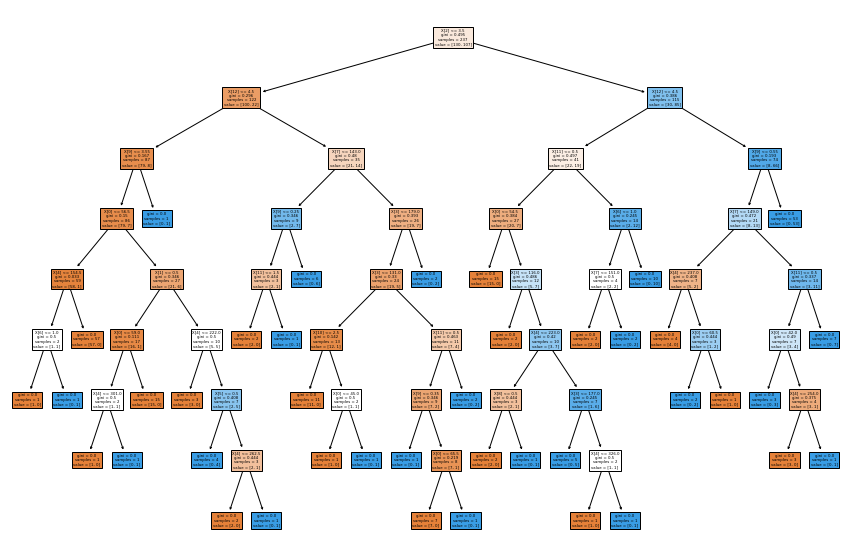

In [157]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)


In [158]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [159]:
ccp_alphas

array([0.        , 0.00361664, 0.00389484, 0.00397121, 0.00414789,
       0.00524412, 0.00562588, 0.00562588, 0.00562588, 0.00632911,
       0.00640349, 0.00642958, 0.00642958, 0.00678119, 0.0068917 ,
       0.00723327, 0.00750117, 0.00825226, 0.00976415, 0.00984529,
       0.01459122, 0.01841987, 0.01914362, 0.01998666, 0.0278114 ,
       0.04087473, 0.15599395])

In [160]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.15599395100117053


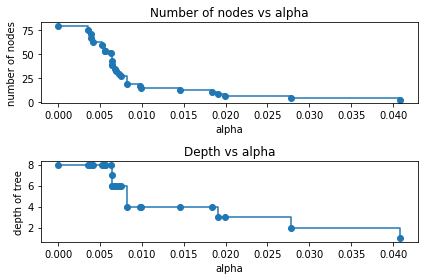

In [161]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

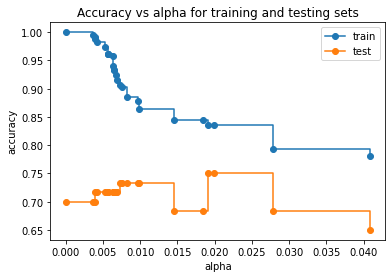

In [162]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()



In [163]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [164]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.75

[Text(334.8, 475.65000000000003, 'X[2] <= 3.5\ngini = 0.495\nsamples = 237\nvalue = [130, 107]'),
 Text(167.4, 339.75, 'gini = 0.296\nsamples = 122\nvalue = [100, 22]'),
 Text(502.20000000000005, 339.75, 'X[12] <= 4.5\ngini = 0.386\nsamples = 115\nvalue = [30, 85]'),
 Text(334.8, 203.85000000000002, 'X[11] <= 0.5\ngini = 0.497\nsamples = 41\nvalue = [22, 19]'),
 Text(167.4, 67.94999999999999, 'gini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(502.20000000000005, 67.94999999999999, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(669.6, 203.85000000000002, 'gini = 0.193\nsamples = 74\nvalue = [8, 66]')]

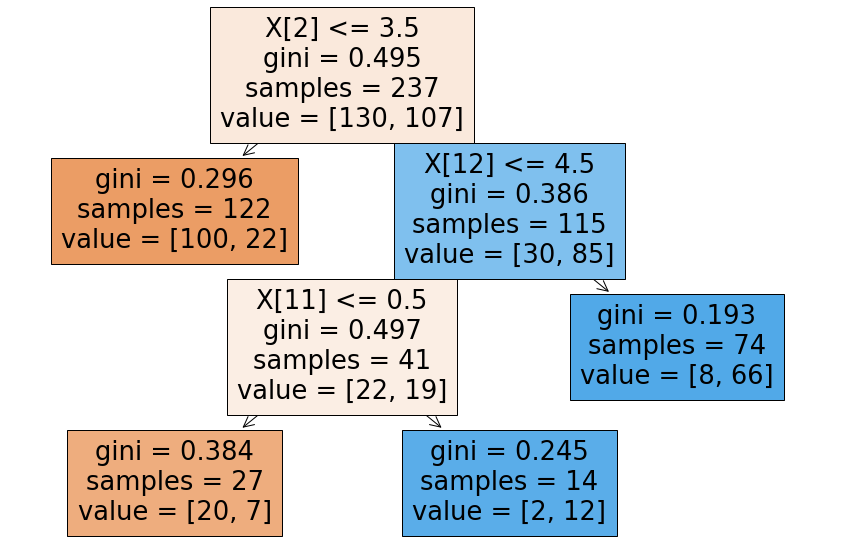

In [136]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [137]:
clf2 = DecisionTreeClassifier(random_state=0,criterion="entropy" ) 
clf2 = clf2.fit(X_train,y_train)

[Text(466.1625, 522.6923076923077, 'X[2] <= 3.5\nentropy = 0.993\nsamples = 237\nvalue = [130, 107]'),
 Text(244.12500000000003, 480.8769230769231, 'X[12] <= 4.5\nentropy = 0.681\nsamples = 122\nvalue = [100, 22]'),
 Text(116.25000000000001, 439.0615384615385, 'X[3] <= 133.0\nentropy = 0.443\nsamples = 87\nvalue = [79, 8]'),
 Text(37.2, 397.2461538461539, 'X[11] <= 2.5\nentropy = 0.137\nsamples = 52\nvalue = [51, 1]'),
 Text(18.6, 355.4307692307692, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(55.800000000000004, 355.4307692307692, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 313.61538461538464, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(74.4, 313.61538461538464, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(195.3, 397.2461538461539, 'X[1] <= 0.5\nentropy = 0.722\nsamples = 35\nvalue = [28, 7]'),
 Text(130.20000000000002, 355.4307692307692, 'X[4] <= 313.5\nentropy = 0.286\nsamples = 20\nvalue = [19, 1]'),
 Text(111.60000000000001, 3

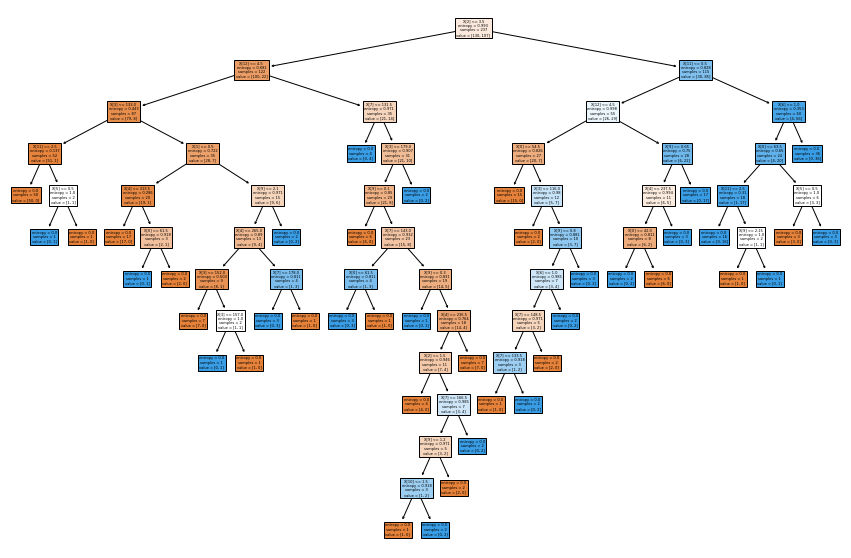

In [138]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)

In [139]:
path2 = clf2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path2.ccp_alphas, path2.impurities

In [140]:
clfs2 = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf2.fit(X_train, y_train)
    clfs2.append(clf2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs2[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24094564445756783


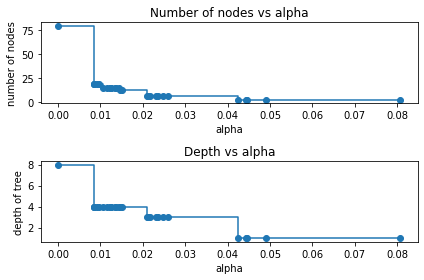

In [141]:
clfs2 = clfs2[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf2.tree_.node_count for clf2 in clfs2]
depth = [clf2.tree_.max_depth for clf2 in clfs2]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

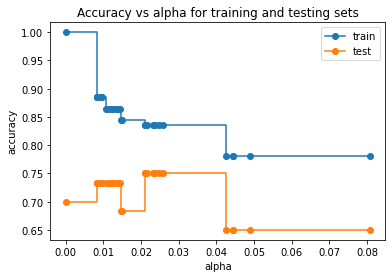

In [142]:
train_scores = [clf2.score(X_train, y_train) for clf2 in clfs2]
test_scores = [clf2.score(X_test, y_test) for clf2 in clfs2]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [153]:
clf2 = DecisionTreeClassifier(random_state=0,criterion="entropy", ccp_alpha=0.01)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', random_state=0)

In [154]:
pred2=clf2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.7333333333333333

[Text(372.0, 489.24, 'X[2] <= 3.5\nentropy = 0.993\nsamples = 237\nvalue = [130, 107]'),
 Text(186.0, 380.52000000000004, 'X[12] <= 4.5\nentropy = 0.681\nsamples = 122\nvalue = [100, 22]'),
 Text(93.0, 271.8, 'entropy = 0.443\nsamples = 87\nvalue = [79, 8]'),
 Text(279.0, 271.8, 'entropy = 0.971\nsamples = 35\nvalue = [21, 14]'),
 Text(558.0, 380.52000000000004, 'X[11] <= 0.5\nentropy = 0.828\nsamples = 115\nvalue = [30, 85]'),
 Text(465.0, 271.8, 'X[12] <= 4.5\nentropy = 0.998\nsamples = 55\nvalue = [26, 29]'),
 Text(279.0, 163.08000000000004, 'X[0] <= 54.5\nentropy = 0.826\nsamples = 27\nvalue = [20, 7]'),
 Text(186.0, 54.360000000000014, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(372.0, 54.360000000000014, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(651.0, 163.08000000000004, 'X[9] <= 0.65\nentropy = 0.75\nsamples = 28\nvalue = [6, 22]'),
 Text(558.0, 54.360000000000014, 'entropy = 0.994\nsamples = 11\nvalue = [6, 5]'),
 Text(744.0, 54.360000000000014, 'entrop

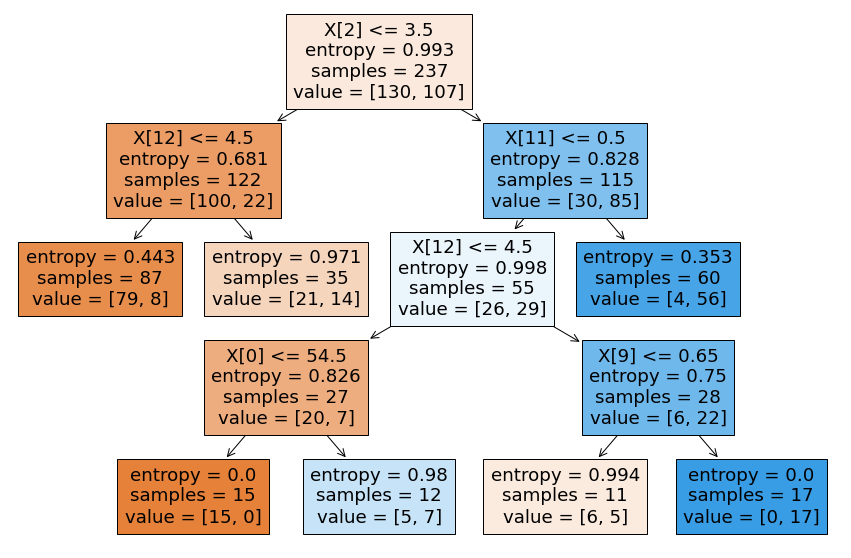

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2,filled=True)


In [66]:
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(data, target, nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    d_tree=DecisionTreeClassifier()
    
    gridsearch = GridSearchCV(d_tree, param_grid, cv=nfolds)
    gridsearch.fit(data, target)
    return gridsearch.best_params_
print("Best hyperparameter for this case:",dtree_grid_search(df, y, 3))

Best hyperparameter for this case: {'criterion': 'gini', 'max_depth': 2}


In [67]:
df3 = pd.read_csv('../housepricedata.csv')
df3

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [68]:
dataset = df.values
dataset 

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  1.],
       [57.,  1.,  4., ...,  1.,  7.,  1.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

In [69]:
x = dataset[:,0:10]
Y = dataset[:,10]

In [70]:
x_train3,x_test3,Y_train3,Y_test3 = train_test_split(x,Y,random_state=0, test_size=0.2)
clf3 = DecisionTreeClassifier(random_state=0)
clf3.fit(x_train3,Y_train3)

DecisionTreeClassifier(random_state=0)

[Text(338.5222355769231, 524.1857142857143, 'X[9] <= 0.15\ngini = 0.57\nsamples = 237\nvalue = [110, 108, 19]'),
 Text(112.67307692307693, 485.3571428571429, 'X[7] <= 153.0\ngini = 0.276\nsamples = 80\nvalue = [67, 12, 1]'),
 Text(51.50769230769231, 446.52857142857147, 'X[5] <= 0.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10, 0]'),
 Text(25.753846153846155, 407.70000000000005, 'X[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9, 0]'),
 Text(12.876923076923077, 368.8714285714286, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(38.63076923076923, 368.8714285714286, 'X[9] <= 0.05\ngini = 0.494\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(25.753846153846155, 330.0428571428572, 'X[2] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4, 0]'),
 Text(12.876923076923077, 291.2142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(38.63076923076923, 291.2142857142857, 'X[4] <= 191.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(25.753846153846155, 252.3857142857143, 'gini = 

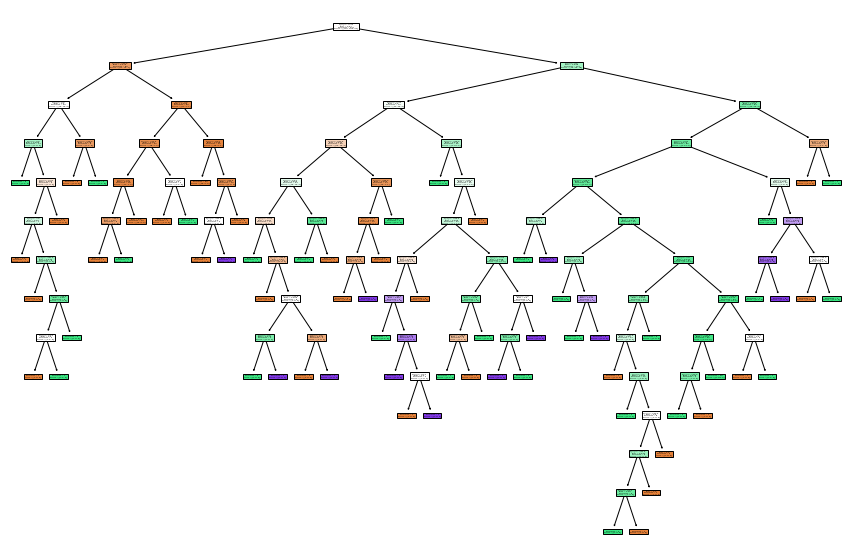

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf3,filled=True)

In [72]:
path3 = clf3.cost_complexity_pruning_path(x_train3, Y_train3)
ccp_alphas3, impurities3 = path3.ccp_alphas, path3.impurities

In [73]:
ccp_alphas3

array([0.        , 0.00274262, 0.00316456, 0.00322082, 0.00337553,
       0.00385775, 0.00389484, 0.00397121, 0.00421941, 0.00428638,
       0.00548523, 0.00562588, 0.00562588, 0.00562588, 0.00562588,
       0.00587408, 0.00632911, 0.00632911, 0.00632911, 0.00632911,
       0.00661041, 0.00685654, 0.00703235, 0.00711508, 0.00723327,
       0.00727964, 0.00820441, 0.00822785, 0.00904159, 0.00976685,
       0.00984529, 0.01048337, 0.01116637, 0.01367647, 0.02661744,
       0.02775929, 0.12098377])

In [77]:
clfs3 = []
for ccp_alpha3 in ccp_alphas3:
    clf3 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha3)
    clf3.fit(x_train3, Y_train3)
    clfs3.append(clf3)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs3[-1].tree_.node_count, ccp_alphas3[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12098376510015907


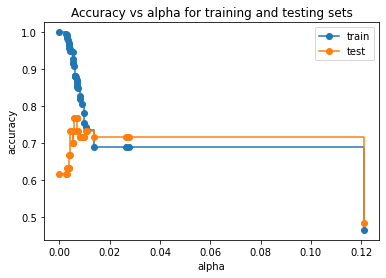

In [79]:
train_scores3 = [clf3.score(x_train3, Y_train3) for clf3 in clfs3]
test_scores3 = [clf3.score(x_test3, Y_test3) for clf3 in clfs3]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas3, train_scores3, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas3, test_scores3, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [102]:
clf3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.013)
clf3.fit(x_train3,Y_train3)

DecisionTreeClassifier(ccp_alpha=0.013, random_state=0)

In [103]:
pred3=clf3.predict(x_test3)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test3, pred3)

0.7333333333333333

[Text(372.0, 489.24, 'X[9] <= 0.15\ngini = 0.57\nsamples = 237\nvalue = [110, 108, 19]'),
 Text(186.0, 380.52000000000004, 'X[7] <= 153.0\ngini = 0.276\nsamples = 80\nvalue = [67, 12, 1]'),
 Text(93.0, 271.8, 'gini = 0.5\nsamples = 20\nvalue = [10, 10, 0]'),
 Text(279.0, 271.8, 'gini = 0.096\nsamples = 60\nvalue = [57, 2, 1]'),
 Text(558.0, 380.52000000000004, 'X[2] <= 3.5\ngini = 0.538\nsamples = 157\nvalue = [43, 96, 18]'),
 Text(465.0, 271.8, 'X[9] <= 1.15\ngini = 0.6\nsamples = 73\nvalue = [31, 33, 9]'),
 Text(279.0, 163.08000000000004, 'X[4] <= 259.5\ngini = 0.542\nsamples = 38\nvalue = [22, 13, 3]'),
 Text(186.0, 54.360000000000014, 'gini = 0.569\nsamples = 24\nvalue = [10, 12, 2]'),
 Text(372.0, 54.360000000000014, 'gini = 0.255\nsamples = 14\nvalue = [12, 1, 1]'),
 Text(651.0, 163.08000000000004, 'X[3] <= 128.0\ngini = 0.578\nsamples = 35\nvalue = [9, 20, 6]'),
 Text(558.0, 54.360000000000014, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(744.0, 54.360000000000014, 'gini

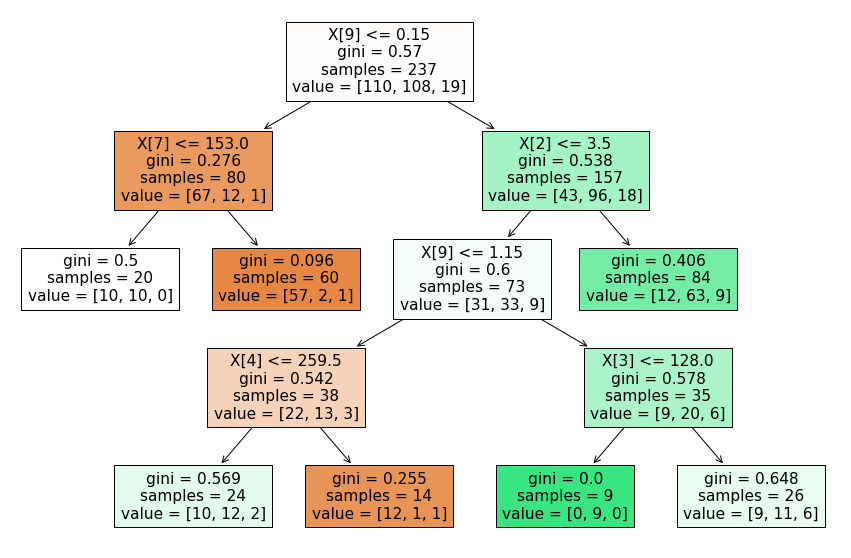

In [104]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf3,filled=True)

In [105]:
x_train4,x_test4,Y_train4,Y_test4 = train_test_split(x,Y,random_state=0,test_size = 0.2)
clf4 = DecisionTreeClassifier(random_state=0,criterion="entropy")
clf4.fit(x_train4,Y_train4)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(343.344375, 520.95, 'X[9] <= 0.15\nentropy = 1.323\nsamples = 237\nvalue = [110, 108, 19]'),
 Text(89.28, 475.65000000000003, 'X[7] <= 153.0\nentropy = 0.704\nsamples = 80\nvalue = [67, 12, 1]'),
 Text(44.64, 430.35, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 20\nvalue = [10, 10, 0]'),
 Text(22.32, 385.05, 'X[1] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9, 0]'),
 Text(11.16, 339.75, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(33.480000000000004, 339.75, 'X[9] <= 0.05\nentropy = 0.991\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(22.32, 294.45, 'X[2] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4, 0]'),
 Text(11.16, 249.14999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(33.480000000000004, 249.14999999999998, 'X[4] <= 191.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(22.32, 203.84999999999997, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(44.64, 203.84999999999997, 'X[7] <= 115.5\nentropy = 0.722\nsamples = 5\nvalue = [1

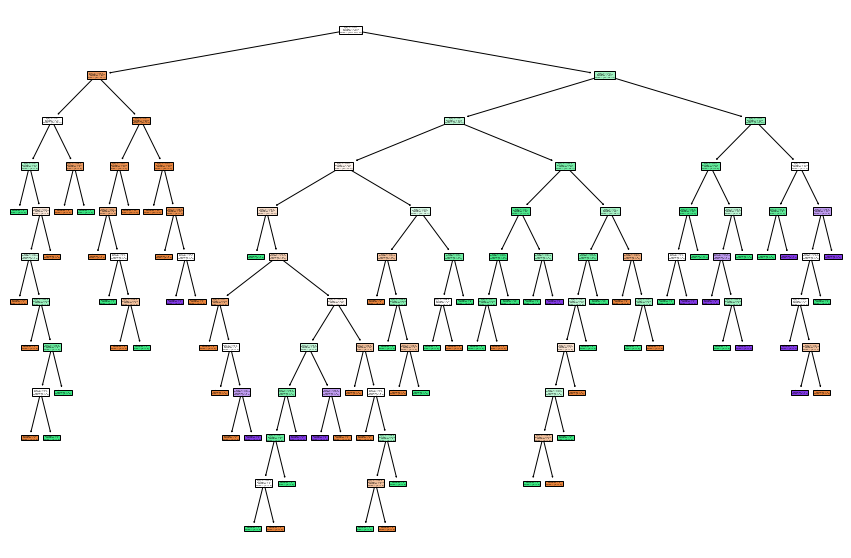

In [106]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf4,filled=True)

In [109]:
path4 = clf4.cost_complexity_pruning_path(x_train4, Y_train4)
ccp_alphas4, impurities4 = path4.ccp_alphas, path4.impurities

In [110]:
ccp_alphas3

array([0.        , 0.00274262, 0.00316456, 0.00322082, 0.00337553,
       0.00385775, 0.00389484, 0.00397121, 0.00421941, 0.00428638,
       0.00548523, 0.00562588, 0.00562588, 0.00562588, 0.00562588,
       0.00587408, 0.00632911, 0.00632911, 0.00632911, 0.00632911,
       0.00661041, 0.00685654, 0.00703235, 0.00711508, 0.00723327,
       0.00727964, 0.00820441, 0.00822785, 0.00904159, 0.00976685,
       0.00984529, 0.01048337, 0.01116637, 0.01367647, 0.02661744,
       0.02775929, 0.12098377])

In [111]:
clfs4 = []
for ccp_alpha4 in ccp_alphas4:
    clf4 = DecisionTreeClassifier(random_state=0,criterion="entropy", ccp_alpha=ccp_alpha4)
    clf4.fit(x_train4, Y_train4)
    clfs4.append(clf4)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs4[-1].tree_.node_count, ccp_alphas4[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2212082854929327


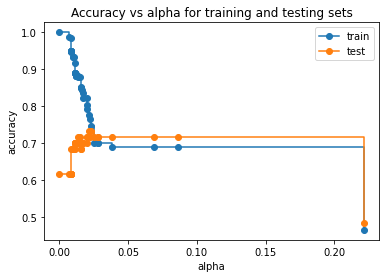

In [112]:
train_scores4 = [clf4.score(x_train4, Y_train4) for clf4 in clfs4]
test_scores4 = [clf4.score(x_test4, Y_test4) for clf4 in clfs4]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas4, train_scores4, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas4, test_scores4, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [113]:
clf4 = DecisionTreeClassifier(random_state=0,criterion="entropy", ccp_alpha=0.025)
clf4.fit(x_train4,Y_train4)

DecisionTreeClassifier(ccp_alpha=0.025, criterion='entropy', random_state=0)

In [115]:
pred4=clf4.predict(x_test4)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test4, pred4)

0.7333333333333333

In [116]:
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(data, target, nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    d_tree=DecisionTreeClassifier()
    
    gridsearch = GridSearchCV(d_tree, param_grid, cv=nfolds)
    gridsearch.fit(data, target)
    return gridsearch.best_params_
print("Best hyperparameter for this case:",dtree_grid_search(X, y, 3))


Best hyperparameter for this case: {'criterion': 'gini', 'max_depth': 3}


In [117]:
clf = DecisionTreeClassifier(random_state=0,criterion="gini" ,max_depth=3 ) 
clf = clf.fit(X_train,y_train)

In [118]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [119]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15599395100117058


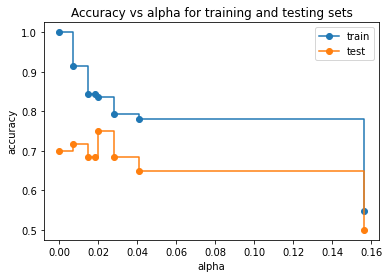

In [120]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [121]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [122]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.75